# Advertising Sales Channel Prediction

## Data description

When a company enters a market, the distribution strategy and channel it uses are keys to its success in the market, as well as market know-how and customer knowledge and understanding. Because an effective distribution strategy under efficient supply-chain management opens doors for attaining competitive advantage and strong brand equity in the market, it is a component of the marketing mix that cannot be ignored . 

The distribution strategy and the channel design have to be right the first time. The case study of Sales channel includes the detailed study of TV, radio and newspaper channel. The predict the total sales generated from all the sales channel.  

## Importing modules

In [53]:
import numpy as np
import pandas as pd
import seaborn as sns
from scipy import stats
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

## Reading csv file 

In [2]:
df = pd.read_csv('Advertising.csv', index_col=[0])
df.head()

,TV,radio,newspaper,sales
1,230.1,37.8,69.2,22.1
2,44.5,39.3,45.1,10.4
3,17.2,45.9,69.3,9.3
4,151.5,41.3,58.5,18.5
5,180.8,10.8,58.4,12.9


In [3]:
df.shape

(200, 4)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 200 entries, 1 to 200
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   TV         200 non-null    float64
 1   radio      200 non-null    float64
 2   newspaper  200 non-null    float64
 3   sales      200 non-null    float64
dtypes: float64(4)
memory usage: 7.8 KB


In [5]:
df.describe()

,TV,radio,newspaper,sales
count,200.000000,200.000000,200.000000,200.000000
mean,147.042500,23.264000,30.554000,14.022500
std,85.854236,14.846809,21.778621,5.217457
min,0.700000,0.000000,0.300000,1.600000
25%,74.375000,9.975000,12.750000,10.375000
50%,149.750000,22.900000,25.750000,12.900000
75%,218.825000,36.525000,45.100000,17.400000
max,296.400000,49.600000,114.000000,27.000000


# Data Cleaning

## Checking for null values 

In [6]:

df.isnull().sum()

TV           0
radio        0
newspaper    0
sales        0
dtype: int64

No null values are present

## checking for outlliers 

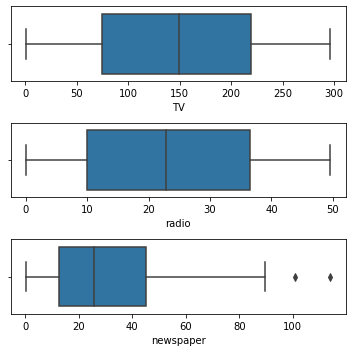

In [54]:
fig, axs = plt.subplots(3, figsize = (5,5))
plt1 = sns.boxplot(df['TV'], ax = axs[0])
plt2 = sns.boxplot(df['radio'], ax = axs[1])
plt3 = sns.boxplot(df['newspaper'], ax = axs[2])
plt.tight_layout()

There are no considerable outliers present in the data.

# EDA

<AxesSubplot:xlabel='TV', ylabel='sales'>

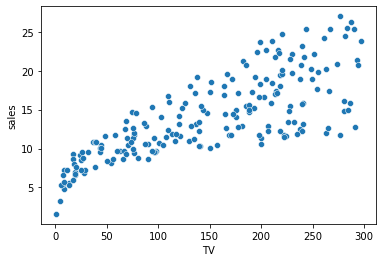

In [67]:
# Let's see how Sales are related with other variables using scatter plot.

sns.scatterplot(x='TV', y='sales', data=df)

<AxesSubplot:xlabel='newspaper', ylabel='sales'>

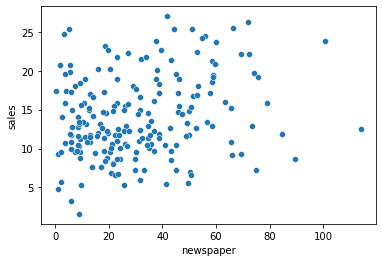

In [9]:
sns.scatterplot(x='newspaper', y='sales', data=df)

<AxesSubplot:xlabel='radio', ylabel='sales'>

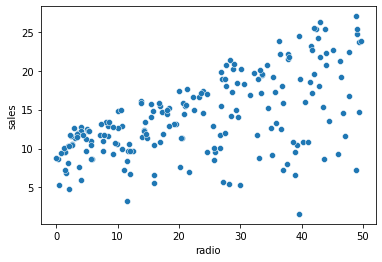

In [10]:
sns.scatterplot(x='radio', y='sales', data=df)

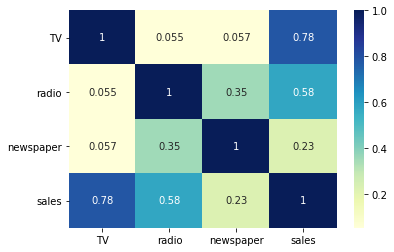

In [11]:
# let's see the correlation between different variable

sns.heatmap(df.corr(), cmap="YlGnBu", annot = True)
plt.show()

As it is visible from the scatterplot and the heatmap, the variable TV seems to be most correlated with Sales.

<Figure size 1440x360 with 0 Axes>

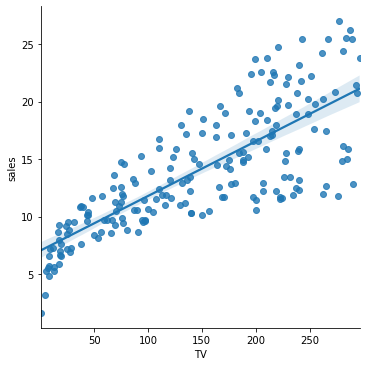

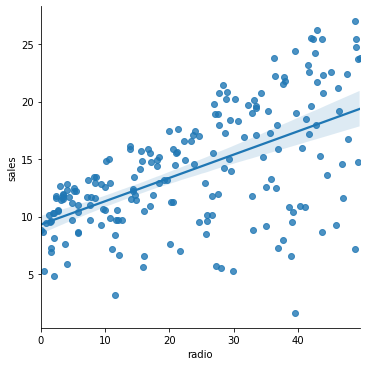

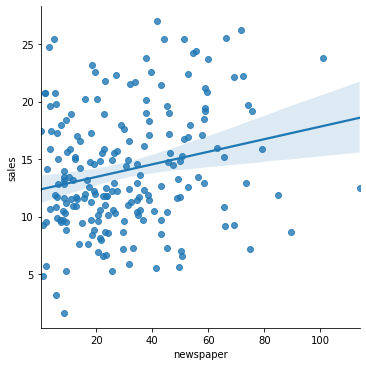

In [68]:
#This is a linear model plot.

plt.figure(figsize=(20, 5))
sns.lmplot(data=df, x='TV', y='sales', fit_reg=True)
sns.lmplot(data=df, x='radio', y='sales', fit_reg=True)
sns.lmplot(data=df, x='newspaper', y='sales', fit_reg=True)

We can also see that their is a linear relationship between the independent variable and target varibale.


# Model Building

In [13]:
x = df.drop('sales', axis=1)
y = df['sales']

In [14]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=69)

In [15]:
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.linear_model import ElasticNet
from sklearn.ensemble import AdaBoostRegressor

[0.04579596 0.18045523 0.00108996]


Text(0, 0.5, 'Predicted Values')

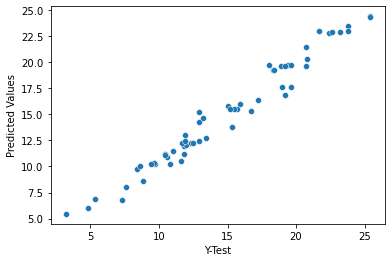

In [55]:
lr = LinearRegression()
lr.fit(x_train, y_train)
print(lr.coef_)
predlr = lr.predict(x_test)
sns.scatterplot(y_test, pred)
plt.xlabel("Y-Test")
plt.ylabel("Predicted Values")

[0.04579593 0.18044804 0.00109177]


Text(0, 0.5, 'Predicted Values')

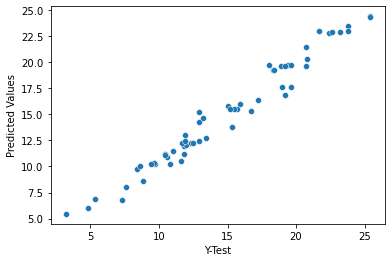

In [56]:
r = Ridge()
r.fit(x_train, y_train)
print(r.coef_)
predr = r.predict(x_test)
sns.scatterplot(y_test, pred)
plt.xlabel("Y-Test")
plt.ylabel("Predicted Values")

Text(0, 0.5, 'Predcited Values')

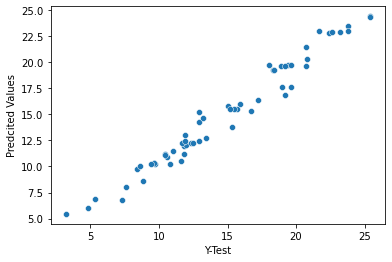

In [57]:
l = Lasso()
l.fit(x_train,y_train)
predl = l.predict(x_test)
sns.scatterplot(y_test, pred)
plt.xlabel("Y-Test")
plt.ylabel("Predcited Values")

Text(0, 0.5, 'Predcited Values')

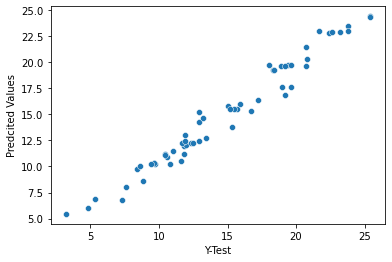

In [58]:
e = ElasticNet()
e.fit(x_train,y_train)
prede = e.predict(x_test)
sns.scatterplot(y_test, pred)
plt.xlabel("Y-Test")
plt.ylabel("Predcited Values")

Text(0, 0.5, 'Predcited Values')

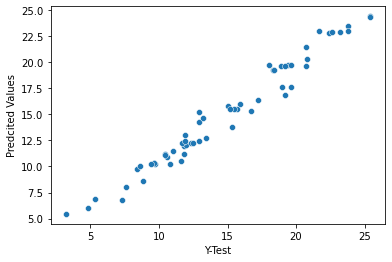

In [59]:
ada = AdaBoostRegressor()
ada.fit(x_train, y_train)
predada = ada.predict(x_test)
sns.scatterplot(y_test, pred)
plt.xlabel("Y-Test")
plt.ylabel("Predcited Values")

# Metrics Evaluation

In [37]:
import sklearn.metrics as metrics

In [38]:
print('MAE: {}'.format(metrics.mean_absolute_error(y_test, predlr)))
print('MSE: {}'.format(metrics.mean_squared_error(y_test, predlr)))
print('RMSE: {}'.format(np.sqrt(metrics.mean_squared_error(y_test, predlr))))

MAE: 1.146512690227964
MSE: 2.078569872417908
RMSE: 1.4417246174002538


In [39]:
print('MAE: {}'.format(metrics.mean_absolute_error(y_test, predr)))
print('MSE: {}'.format(metrics.mean_squared_error(y_test, predr)))
print('RMSE: {}'.format(np.sqrt(metrics.mean_squared_error(y_test, predr))))

MAE: 1.1465412561816883
MSE: 2.078646334941802
RMSE: 1.441751134884867


In [40]:
print('MAE: {}'.format(metrics.mean_absolute_error(y_test, predl)))
print('MSE: {}'.format(metrics.mean_squared_error(y_test, predl)))
print('RMSE: {}'.format(np.sqrt(metrics.mean_squared_error(y_test, predl))))

MAE: 1.166758244639265
MSE: 2.1287515684273925
RMSE: 1.459024183633497


In [41]:
print('MAE: {}'.format(metrics.mean_absolute_error(y_test, prede)))
print('MSE: {}'.format(metrics.mean_squared_error(y_test, prede)))
print('RMSE: {}'.format(np.sqrt(metrics.mean_squared_error(y_test, prede))))

MAE: 1.1586117867035115
MSE: 2.107876606448695
RMSE: 1.451852818452578


In [42]:
print('MAE: {}'.format(metrics.mean_absolute_error(y_test, predada)))
print('MSE: {}'.format(metrics.mean_squared_error(y_test, predada)))
print('RMSE: {}'.format(np.sqrt(metrics.mean_squared_error(y_test, predada))))

MAE: 0.8493265248684004
MSE: 1.075854803805557
RMSE: 1.0372342087520818


# Checking cross validation score

In [43]:
from sklearn.model_selection import cross_val_score

In [44]:
# cross validation score for linear regression

scores = cross_val_score(lr, x_train, y_train, scoring="neg_mean_squared_error", cv=10)
rmse_scores = np.sqrt(-scores)
    
print("Scores: ", scores)
print("Mean: ", scores.mean())

Scores:  [ -2.2072615   -3.23976887  -1.95099514  -2.01101796 -11.95925719
  -2.91553405  -1.71565255  -2.97886423  -2.93379946  -2.10072017]
Mean:  -3.401287110842662


In [45]:
# cross validation score for Ridge regression

scores = cross_val_score(r, x_train, y_train, scoring="neg_mean_squared_error", cv=10)
rmse_scores = np.sqrt(-scores)
    
print("Scores: ", scores)
print("Mean: ", scores.mean())

Scores:  [ -2.2073032   -3.23973725  -1.95099732  -2.01094743 -11.95879604
  -2.91556491  -1.71582036  -2.97882606  -2.9338462   -2.10080782]
Mean:  -3.4012646577026784


In [46]:
# cross validation score for lasso regression

scores = cross_val_score(l, x_train, y_train, scoring="neg_mean_squared_error", cv=10)
rmse_scores = np.sqrt(-scores)
    
print("Scores: ", scores)
print("Mean: ", scores.mean())

Scores:  [ -2.22805451  -3.18351496  -1.96409228  -1.94251365 -11.69364199
  -2.93663143  -1.74848563  -2.94656687  -2.89204736  -2.14028906]
Mean:  -3.367583773465108


In [47]:
# cross validation score for elastic net

scores = cross_val_score(e, x_train, y_train, scoring="neg_mean_squared_error", cv=10)
rmse_scores = np.sqrt(-scores)
    
print("Scores: ", scores)
print("Mean: ", scores.mean())

Scores:  [ -2.21941993  -3.19252819  -1.94874677  -1.97141971 -11.7729091
  -2.92713313  -1.7418839   -2.94640521  -2.91399263  -2.12510333]
Mean:  -3.3759541910371027


In [62]:
# cross validation score for ada boost regressor

scores = cross_val_score(ada, x_train, y_train, scoring="neg_mean_squared_error", cv=10)
rmse_scores = np.sqrt(-scores)
    
print("Scores: ", scores)
print("Mean: ", scores.mean())

Scores:  [-0.81135407 -2.05533349 -0.68916639 -0.59524762 -2.82068019 -1.38640662
 -1.23923336 -0.66373317 -1.86531215 -1.85159559]
Mean:  -1.3978062634728654
